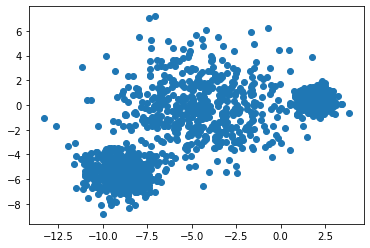

In [105]:
import pandas as pd
import numpy as np
import random
data = pd.read_csv("data.csv")
X = data[["x1", "x2"]].values
np.random.shuffle(X)
X = np.concatenate([X, np.full((X.shape[0],1), -1)], axis=-1)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [117]:
def random_centroids(data, dim, k):
  centroids = []
  for i in range(k):
    centroid = []
    for d in range(dim):
      rand = random.randint(int(min(data[:,d])), int(max(data[:,d])))
      centroid.append(rand)
    centroids.append(centroid)
  return centroids

def point_clustering(data, centroids, dims):
  for point in (data):
    nearest_centroid = 0
    nearest_centroid_dist = None
    for i in range(len(centroids)):
      euclidean_dist = 0
      for d in range(dims):
        dist = abs(point[d] - centroids[i][d])
        euclidean_dist += dist
      euclidean_dist = np.sqrt(euclidean_dist)
      if nearest_centroid_dist == None:
        nearest_centroid_dist = euclidean_dist
        nearest_centroid = i
      elif nearest_centroid_dist > euclidean_dist:
        nearest_centroid_dist = euclidean_dist
        nearest_centroid = i
    point[-1] = nearest_centroid
  return data

In [118]:
def mean_centroid(data, centroids, dims):
  new_centroids = []
  for i in range(len(centroids)):
    new_centroid = []
    n_of_points = 0
    total_of_points = []
    for point in data:
      if point[-1] == i:
        n_of_points += 1
        for dim in range(dims):
          if dim < len(total_of_points):
            total_of_points[dim] += point[dim]
          else:
            total_of_points.append(point[dim])
    if len(total_of_points) != 0:
      for dim in range(dims):
        new_centroid.append(total_of_points[dim]/n_of_points)
      new_centroids.append(new_centroid)
    else: 
      new_centroids.append(centroids[i])
  return new_centroids

In [119]:
def calculate_wcv(clusters):
  n = len(clusters)
  wcv = 0

  for i in range(n):
    temp = 0
    m = len(clusters[i])
    for j in range(m - 1):
      for k in range(j + 1, m):
        temp += np.linalg.norm(clusters[i][j] - clusters[i][k])
    temp /= m
    wcv += temp

  return wcv

In [134]:
def k_means_clustering(data, k, epochs):
    dims = len(data[0])
    centroids = random_centroids(data, dims, k)
    
    clustered_data = point_clustering(data, centroids, dims)

    for i in range(epochs):
        centroids = mean_centroid(clustered_data, centroids, dims)
        clustered_data = point_clustering(data, centroids, dims)
    
    clusters = {}
    for i in range(k):
      clusters[i] = []
    for point in data:
      clusters[point[-1]].append(point[:-1])

    try: wcv = calculate_wcv(clusters)
    except: return k_means_clustering(data, k, epochs)

    return data, centroids, wcv

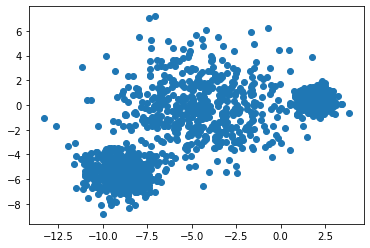

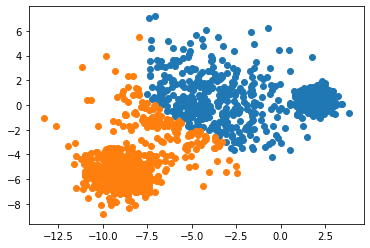

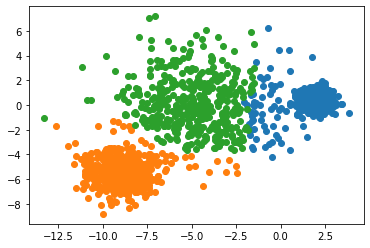

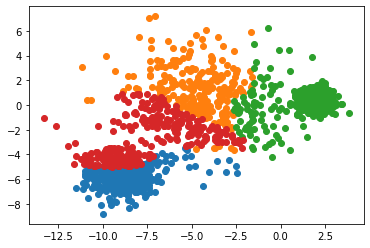

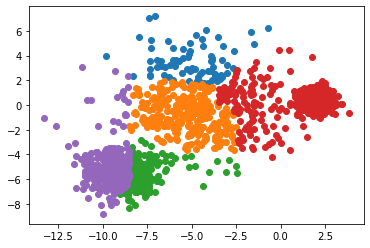

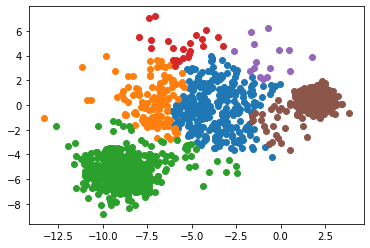

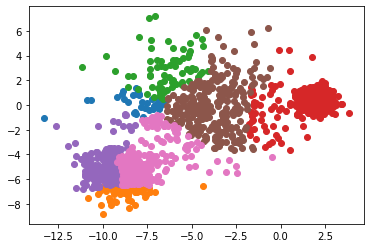

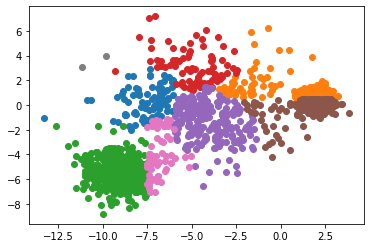

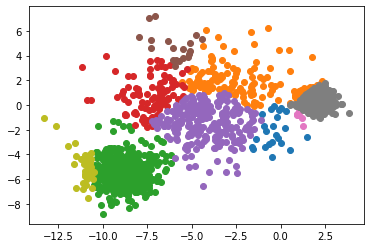

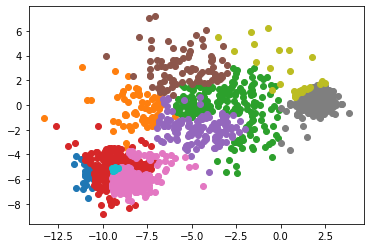

In [135]:
clusters = []
centroids = []
wcv = []
for k in range(1, 11):
  a, b, c = k_means_clustering(X.copy(), k, 50)
  for i in range(k):
    plt.scatter(a[:,0][a[:,-1] == i], X[:,1][a[:,-1] == i])
  plt.show()
  wcv.append(c)

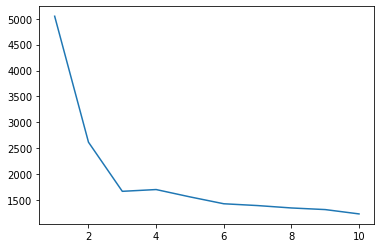

In [136]:
plt.plot(range(1, 11), wcv)